In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.optimizers import Adam
from tensorflow.keras.models import Model
#from sklearn.metrics import confusion_matrix
import itertools
#import imutils
import scipy.io



In [10]:
test_data = scipy.io.loadmat('test_data.mat')
train_data = scipy.io.loadmat('train_data.mat')
train_list = scipy.io.loadmat('lists/train_list.mat')
test_list = scipy.io.loadmat('lists/test_list.mat')
file_list = scipy.io.loadmat('lists/file_list.mat')

In [4]:
train_list['annotation_list']

array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9333'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_2503'], dtype='<U44')]],
      dtype=object)

In [5]:
train_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [7]:
test_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test_info', 'test_fg_data', 'test_data'])

In [50]:
import shutil, os

source_dir_1 = 'Images/n02085620-Chihuahua'
target_dir_1 = 'Train_images/Chihuahua'
target_dir_2 = 'Validate_images/Chihuahua'
target_dir_3 = 'Test_images/Chihuahua'
    
file_names = os.listdir(source_dir_1)

train =int(0.7*len(file_names))
validate = int(0.2*len(file_names))
test = len(file_names) - train - validate

for i  in range(len(file_names)):
    if i <= train-1:
        srcname = os.path.join(source_dir_1, file_names[i])
        dstname = os.path.join(target_dir_1, file_names[i])
        shutil.copy2(srcname, dstname)
    if i> train and i<= train+validate-1:
        srcname = os.path.join(source_dir_1, file_names[i])
        dstname = os.path.join(target_dir_2, file_names[i])
        shutil.copy2(srcname, dstname)
    elif i> train+validate:
        srcname = os.path.join(source_dir_1, file_names[i])
        dstname = os.path.join(target_dir_3, file_names[i])
        shutil.copy2(srcname, dstname)

In [103]:
source_dir_JS = 'Images/n02085782-Japanese_spaniel'
target_JS_1 = 'Train_images/Japanese Spaniel'
target_JS_2 = 'Validate_images/Japanese Spaniel'
target_JS_3 = 'Test_images/Japanese Spaniel'
    
file_names = os.listdir(source_dir_JS)

train =int(0.7*len(file_names))
validate = int(0.2*len(file_names))
test = len(file_names) - train - validate

for i  in range(len(file_names)):
    if i <= train:
        srcname = os.path.join(source_dir_JS, file_names[i])
        dstname = os.path.join(target_JS_1, file_names[i])
        shutil.copy2(srcname, dstname)
    if i> train and i<= train+validate:
        srcname = os.path.join(source_dir_JS, file_names[i])
        dstname = os.path.join(target_JS_2, file_names[i])
        shutil.copy2(srcname, dstname)
    elif i> train+validate:
        srcname = os.path.join(source_dir_JS, file_names[i])
        dstname = os.path.join(target_JS_3, file_names[i])
        shutil.copy2(srcname, dstname)

In [104]:
source_dir_MD = 'Images/n02085936-Maltese_dog'
target_MD_1 = 'Train_images/Maltese Dog'
target_MD_2 = 'Validate_images/Maltese Dog'
target_MD_3 = 'Test_images/Maltese Dog'
    
file_names = os.listdir(source_dir_MD)

train =int(0.7*len(file_names))
validate = int(0.2*len(file_names))
test = len(file_names) - train - validate

for i  in range(len(file_names)):
    if i <= train:
        srcname = os.path.join(source_dir_MD, file_names[i])
        dstname = os.path.join(target_MD_1, file_names[i])
        shutil.copy2(srcname, dstname)
    if i> train and i<= train+validate:
        srcname = os.path.join(source_dir_MD, file_names[i])
        dstname = os.path.join(target_MD_2, file_names[i])
        shutil.copy2(srcname, dstname)
    elif i> train+validate:
        srcname = os.path.join(source_dir_MD, file_names[i])
        dstname = os.path.join(target_MD_3, file_names[i])
        shutil.copy2(srcname, dstname)

In [105]:
print(train, len(os.listdir(target_MD_1)))
print(validate, len(os.listdir(target_MD_2)))
print(test, len(os.listdir(target_MD_3)))

176 177
50 50
26 25


In [106]:
train_path = '/Users/keeshanwilliams/OneDrive - CUNY/My Stuff/Galvenize/DSI/Capstone Projects/Classifictaion_of_Dogs/Train_images'
valid_path = '/Users/keeshanwilliams/OneDrive - CUNY/My Stuff/Galvenize/DSI/Capstone Projects/Classifictaion_of_Dogs/Validate_images'
test_path = '/Users/keeshanwilliams/OneDrive - CUNY/My Stuff/Galvenize/DSI/Capstone Projects/Classifictaion_of_Dogs/Test_images'

# '/Users/keeshanwilliams/OneDrive - CUNY/My Stuff/Galvenize/DSI/Capstone Projects/Classifictaion_of_Dogs/Train_images/Chihuahua'

In [107]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['Chihuahua','Japanese Spaniel','Maltese Dog'], batch_size=6)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['Chihuahua','Japanese Spaniel','Maltese Dog'], batch_size=6)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['Chihuahua','Japanese Spaniel','Maltese Dog'], batch_size=6)

Found 413 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [108]:
imgs, labels = next(train_batches)

In [117]:
len(labels)

6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


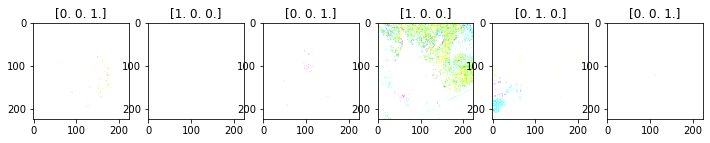

In [118]:
fig, ax = plt.subplots(1, len(labels), figsize = (12, 16))

for i in range(len(labels)):
    ax[i].imshow(imgs[i])
    ax[i].set_title(labels[i])
# # plots(imgs, titles=labels)
# imgs[0].shape

In [121]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [122]:
Dir_Class_Model = Sequential()
for layer in vgg16_model.layers[:-1]:
    Dir_Class_Model.add(layer)

In [123]:
for layer in Dir_Class_Model.layers[:-1]:
    layer.trainable = False

In [124]:
num_classes = 3
Dir_Class_Model.add(Dense(num_classes, activation='softmax'))

In [125]:
Dir_Class_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [126]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [127]:
Dir_Class_Model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [81]:
Dir_Class_Model.fit(train_batches, validation_data=valid_batches, epochs=5, verbose=1)

Epoch 1/5
18/18 [==============================] - 191s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
18/18 [==============================] - 252s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 271s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 200s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 179s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [96]:
test_imgs, test_labels = next(test_batches)
Dir_Class_Model.predict(test_imgs)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)